In [1]:
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

In [2]:
model = YOLO("./weights/best.pt")

In [3]:
def read_img(path: str) -> np.ndarray:
    """
    :param path: File path of the input image.
    :return: Input image.
    """
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def get_imgsz(image: np.ndarray) -> tuple:
    """
    :param image: Model input image.
    :return: Image size set to multiples of maximum stride.
    """
    return (image.shape[0]//32)*32, (image.shape[1]//32)*32

def show_img(image: np.ndarray, results) -> None:
    """
    :param image: Model input image.
    :param results: Path of the video mask image.
    :return: None
    """
    for box in results[0].boxes:
        conf = round(box.conf.numpy()[0], 2)
        x1, y1, x2, y2 = box.xyxy[0]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.rectangle(image, (x1, y1-20), (x1+40, y1), (0, 0, 255), -1)
        cv2.putText(image, str(conf), (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
        
    plt.imshow(image)
    plt.axis("off")
    plt.show()   


0: 1216x2528 7 LPs, 773.7ms
Speed: 42.5ms preprocess, 773.7ms inference, 3.0ms postprocess per image at shape (1, 3, 1216, 2528)


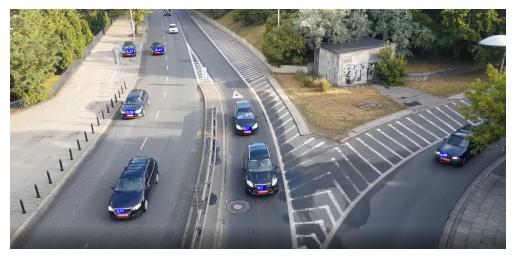

In [4]:
image = read_img("test1.png")

results = model.predict(image, imgsz=get_imgsz(image)) # Prediction was made with CPU.

show_img(image, results)


0: 768x1024 16 LPs, 248.7ms
Speed: 7.0ms preprocess, 248.7ms inference, 1.0ms postprocess per image at shape (1, 3, 768, 1024)


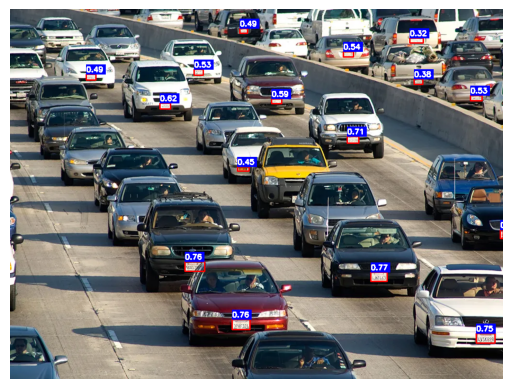

In [5]:
image = read_img("test2.png")

results = model.predict(image, imgsz=get_imgsz(image))

show_img(image, results)